# Customer Retention

A cohort is a customer Segment that is defined by 

> time

> size

> behavior


The are Rows and Columns in a pivot chart:

Rows:
Activity , Month of Acquisition.

Columns:
Retention, Months since Acquisition

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
data = pd.read_excel('online_retail.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Rename the column names
data.columns = data.columns.str.lower()
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [6]:
data['customerid'].nunique()

4372

In [7]:
# drop rows with no customerid
data = data.dropna(subset=['customerid'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
# create a function to get the month
import datetime as dt

# create function for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# apply the function
data['invoicemonth'] = data['invoicedate'].apply(get_month)

data.tail() 

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,invoicemonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [9]:
# create a column index with the minimum invoice date. First time customer was acquired
data['cohortmonth'] = data.groupby('customerid')['invoicemonth'].transform('min')

data.tail()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,invoicemonth,cohortmonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [10]:
# create a date element function to get a series for substraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [11]:
# get date elements for our cohort and invoice columns
_, invoicemonth, invoiceyear = get_date_elements(data,'invoicemonth')
_, cohortmonth, cohortyear = get_date_elements(data, 'cohortmonth')

In [12]:
# create a cohort index
year_diff = invoiceyear - cohortyear
month_diff = invoicemonth - cohortmonth
data['cohortindex'] = year_diff*12 + month_diff 
data.tail()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,invoicemonth,cohortmonth,cohortindex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,4


In [13]:
# count the customerid by grouping by cohort month and cohort index
cohort_data = data.groupby(['cohortmonth', 'cohortindex'])['customerid'].apply(pd.Series.nunique).reset_index()
cohort_data

,cohortmonth,cohortindex,customerid
0,2010-12-01,0,948
1,2010-12-01,1,362
2,2010-12-01,2,317
3,2010-12-01,3,367
4,2010-12-01,4,341
...,...,...,...
86,2011-10-01,1,93
87,2011-10-01,2,46
88,2011-11-01,0,321
89,2011-11-01,1,43


In [14]:
# create a pivot table
cohort_data.pivot(index='cohortmonth', columns=['cohortindex'], values='customerid')

cohortindex,0,1,2,3,4,5,6,7,8,9,10,11,12
cohortmonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohortindex', ylabel='cohortmonth'>

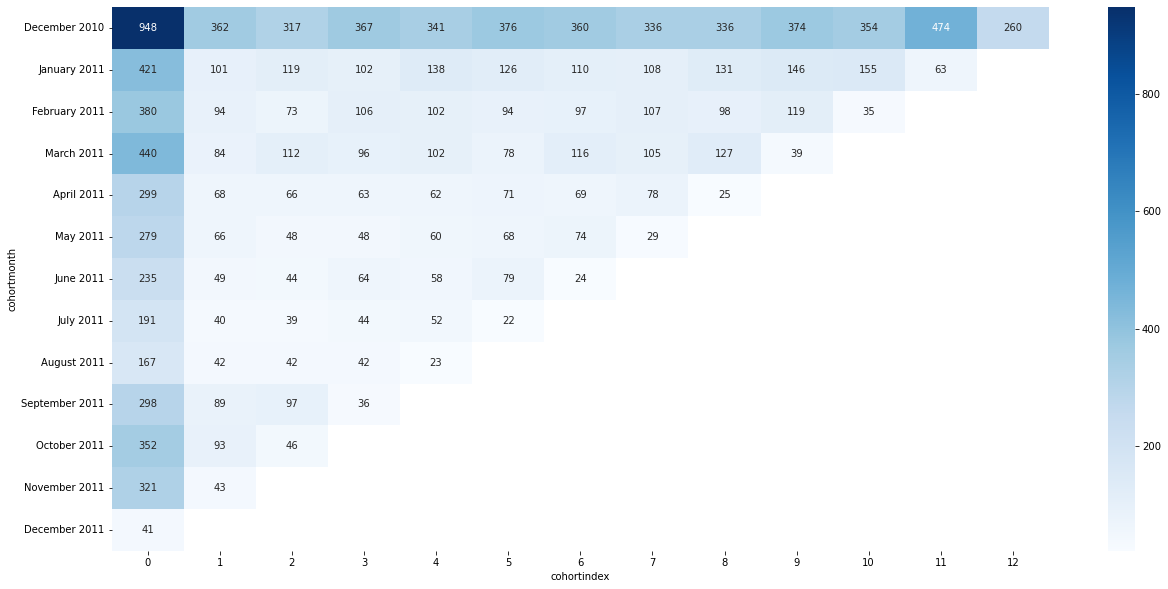

In [22]:
# save as a variable
cohort_table = cohort_data.pivot(index='cohortmonth', columns=['cohortindex'], values='customerid')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

#visualize a heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table, annot=True, cmap='Blues',fmt='.0f')

<AxesSubplot:xlabel='cohortindex', ylabel='cohortmonth'>

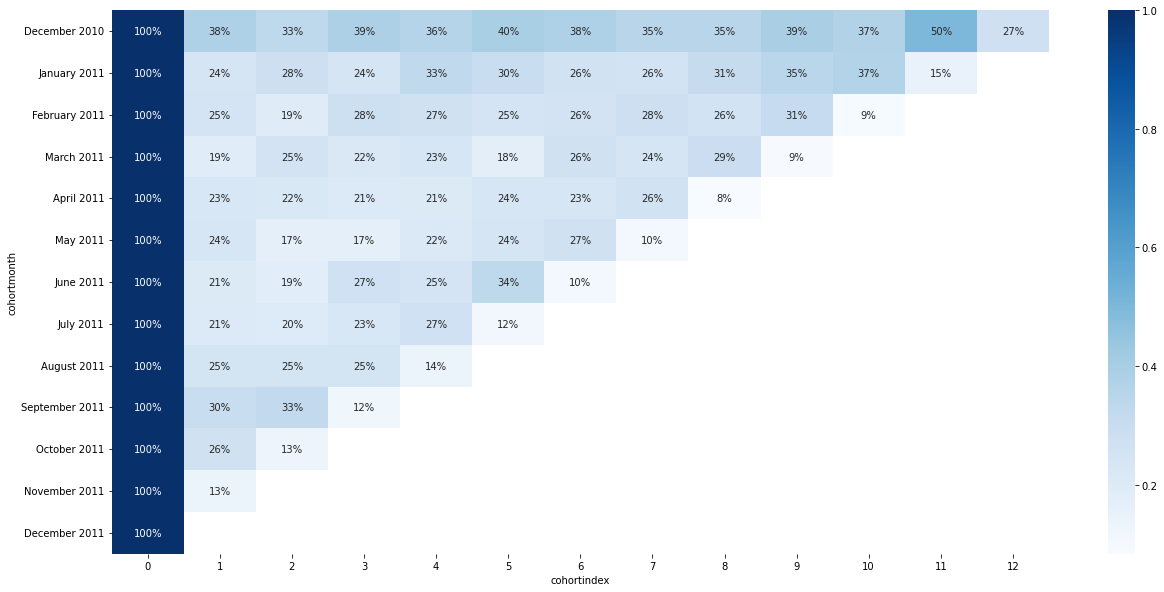

In [18]:
# create a apercentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)


plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues',fmt='.0%')